In [12]:
import scanpy as sc
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3

DATA_PATH = 'transcriptomic_preproc'
MARKERS_CSF_MS_PATH = 'results\markers_CSF_MS.json'
MARKERS_PBMC_MS_PATH = 'results\markers_PBMC_MS.json'
MARKERS_CSF_HC_PATH = 'results\markers_CSF_HC.json'
MARKERS_PBMC_HC_PATH = 'results\markers_PBMC_HC.json'
RANDOM_STATE = 42

In [24]:
markers_csf_ms = json.load(open(MARKERS_CSF_MS_PATH))
markers_pbmc_ms = json.load(open(MARKERS_PBMC_MS_PATH))
markers_csf_hc = json.load(open(MARKERS_CSF_HC_PATH))
markers_pbmc_hc = json.load(open(MARKERS_PBMC_HC_PATH))

In [26]:
markers_csf_ms.keys(), markers_csf_hc.keys()

(dict_keys(['B cells', 'DC', 'HSC/MPP', 'ILC', 'Monocytes', 'Plasma cells', 'T cells']),
 dict_keys(['B cells', 'DC', 'HSC/MPP', 'ILC', 'Monocytes', 'Plasma cells', 'T cells']))

In [17]:
markers_pbmc_ms.keys(), markers_pbmc_hc.keys()

(dict_keys(['B cells', 'Cycling cells', 'DC', 'Double-positive thymocytes', 'ETP', 'HSC/MPP', 'ILC', 'Macrophages', 'Mast cells', 'Megakaryocyte precursor', 'Megakaryocytes/platelets', 'Monocytes', 'Plasma cells', 'T cells', 'pDC']),
 dict_keys(['B cells', 'DC', 'HSC/MPP', 'ILC', 'Megakaryocyte precursor', 'Monocytes', 'Plasma cells', 'T cells']))

In [28]:
cell_types = list(markers_csf_ms.keys()) + list(markers_pbmc_ms.keys()) + list(markers_csf_hc.keys()) + list(markers_pbmc_hc.keys())
cell_types = np.unique(cell_types)
cell_types = cell_types.tolist()

### CSF

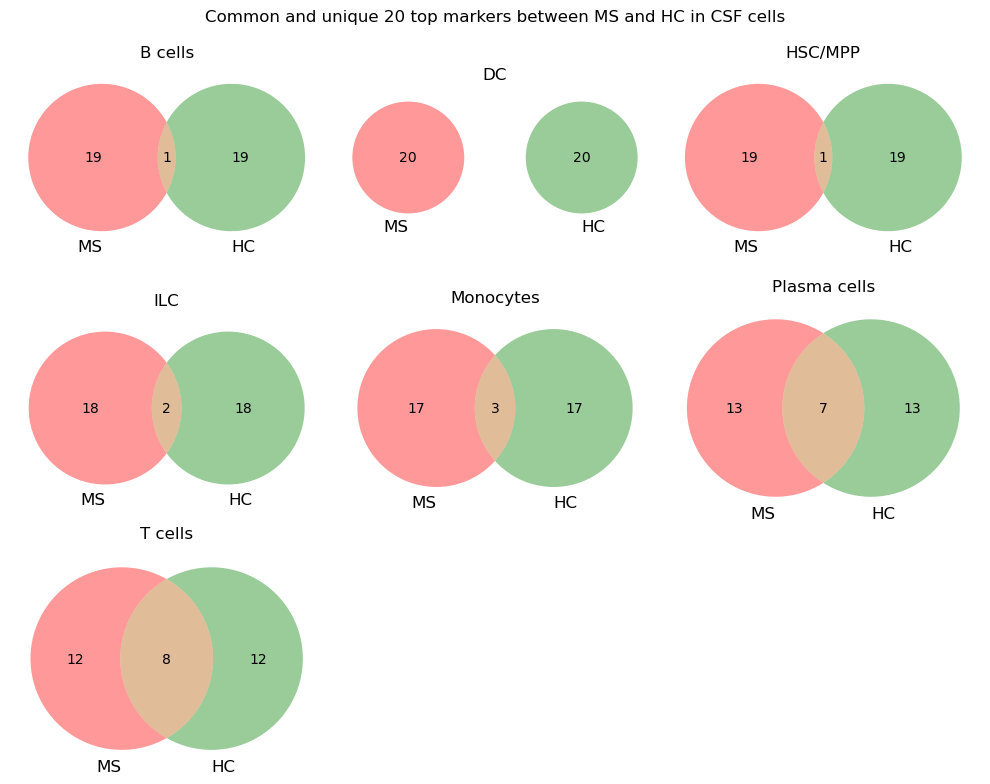

In [51]:
common_markers = {}
unique_markers_MS = {}
unique_markers_HC = {}

for cell_type in markers_csf_ms:
    common_markers[cell_type] = set(markers_csf_ms[cell_type]).intersection(markers_csf_hc[cell_type])
    unique_markers_MS[cell_type] = set(markers_csf_ms[cell_type]) - common_markers[cell_type]
    unique_markers_HC[cell_type] = set(markers_csf_hc[cell_type]) - common_markers[cell_type]

# Crea il diagramma di Venn
plt.figure(figsize=(10, 8))
for i, cell_type in enumerate(markers_csf_ms):
    ax = plt.subplot(3, 3, i+1)
    venn2(subsets=(len(unique_markers_MS[cell_type]), len(unique_markers_HC[cell_type]), len(common_markers[cell_type])),
        set_labels=('MS', 'HC'), ax=ax)
    ax.set_title(cell_type)

plt.suptitle('Common and unique 20 top markers between MS and HC in CSF cells')
plt.tight_layout()
plt.show()

In [53]:
csf_df = pd.DataFrame(common_markers.items(), columns=['Cell Type', 'Common Markers'])
csf_unique_MS_df = pd.DataFrame(unique_markers_MS.items(), columns=['Cell Type', 'MS Unique Markers'])
csf_unique_HC_df = pd.DataFrame(unique_markers_HC.items(), columns=['Cell Type', 'HC Unique Markers'])

In [57]:
csf_df

,Cell Type,Common Markers
0,B cells,{MEF2C}
1,DC,{}
2,HSC/MPP,{MGAT4C}
3,ILC,"{TYROBP, FCER1G}"
4,Monocytes,"{FAM209A, AL359475.1, CASS4}"
5,Plasma cells,"{AC105389.2, FAM209A, BX649632.1, AL391730.2, ..."
6,T cells,"{SYNE2, CD69, TSHZ2, DGKA, KLRG1, GZMK, ATP8B2..."


In [55]:
csf_unique_MS_df

,Cell Type,MS Unique Markers
0,B cells,"{AC006504.7, OR6B2, AC005740.3, AL603824.1, AC..."
1,DC,"{VKORC1L1, RAG1, AC005740.3, CACNA1C, FGF20, P..."
2,HSC/MPP,"{AC061992.2, LINC01271, NMBR-AS1, HSD3B2, AC09..."
3,ILC,"{LINC02465, FFAR3, AL391832.1, TFAM, CACNA1C, ..."
4,Monocytes,"{AC006504.7, AL603824.1, AC005695.3, LINC02416..."
5,Plasma cells,"{AC006504.7, AL603824.1, AJ003147.1, MGAT4C, S..."
6,T cells,"{TBC1D4, AC037198.2, ADGRD1, ELOVL6, SERINC5, ..."


In [56]:
csf_unique_HC_df

,Cell Type,HC Unique Markers
0,B cells,"{HLA-DQA1, RNASE6, HLA-DPA1, HLA-DRB5, CD74, M..."
1,DC,"{CCDC88A, LYZ, MARCKS, DUSP1, IFI30, TYMP, GLU..."
2,HSC/MPP,"{AC006504.7, FCRL2, FBXW9, MYOZ2, SCN3A, AC104..."
3,ILC,"{KLRK1, SRGN, TRAJ57, GNLY, TRAJ49, NKG7, ID2,..."
4,Monocytes,"{CYBB, IFI30, PCDHA4, TEX52, PCDHA2, SPI1, ITG..."
5,Plasma cells,"{PF4, AC000065.1, AURKA, AC102945.1, FCER1G, A..."
6,T cells,"{TRAJ49, CD8A, MIAT, ITGA6, TRAJ61, CD8B, LEF1..."


In [63]:
# save results
csf_df.to_csv('results/common_markers_CSF.csv', index=False)
csf_unique_MS_df.to_csv('results/unique_markers_MS_CSF.csv', index=False)
csf_unique_HC_df.to_csv('results/unique_markers_HC_CSF.csv', index=False)

### PBMC

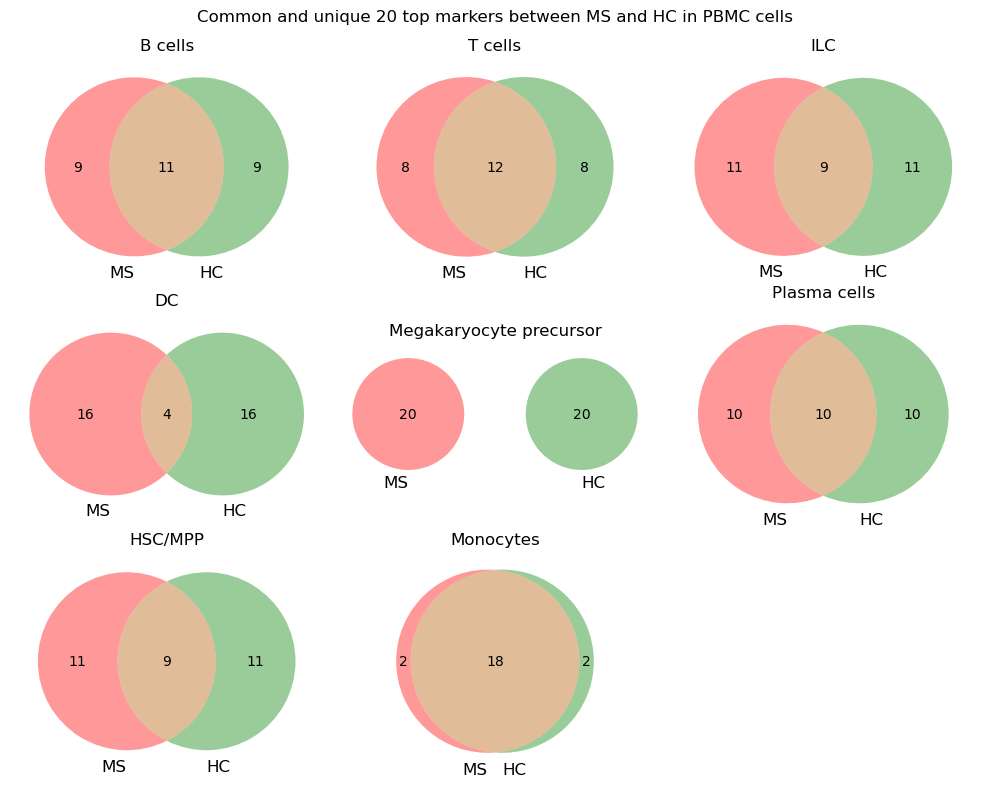

In [49]:
common_markers = {}
unique_markers_MS = {}
unique_markers_HC = {}

common_markers_list = list(set(markers_pbmc_ms.keys()).intersection(markers_pbmc_hc.keys()))

for cell_type in common_markers_list:
    common_markers[cell_type] = set(markers_pbmc_ms[cell_type]).intersection(markers_pbmc_hc[cell_type])
    unique_markers_MS[cell_type] = set(markers_pbmc_ms[cell_type]) - common_markers[cell_type]
    unique_markers_HC[cell_type] = set(markers_pbmc_hc[cell_type]) - common_markers[cell_type]

plt.figure(figsize=(10, 8))
for i, cell_type in enumerate(common_markers_list):
    ax = plt.subplot(3, 3, i+1)
    venn2(subsets=(len(unique_markers_MS[cell_type]), len(unique_markers_HC[cell_type]), len(common_markers[cell_type])),
        set_labels=('MS', 'HC'), ax=ax)
    ax.set_title(cell_type)

plt.suptitle('Common and unique 20 top markers between MS and HC in PBMC cells')
plt.tight_layout()
plt.show()

In [58]:
pbmc_df = pd.DataFrame(common_markers.items(), columns=['Cell Type', 'Common Markers'])
pbmc_unique_MS_df = pd.DataFrame(unique_markers_MS.items(), columns=['Cell Type', 'MS Unique Markers'])
pbmc_unique_HC_df = pd.DataFrame(unique_markers_HC.items(), columns=['Cell Type', 'HC Unique Markers'])

In [59]:
pbmc_df

,Cell Type,Common Markers
0,B cells,{MEF2C}
1,DC,{}
2,HSC/MPP,{MGAT4C}
3,ILC,"{TYROBP, FCER1G}"
4,Monocytes,"{FAM209A, AL359475.1, CASS4}"
5,Plasma cells,"{AC105389.2, FAM209A, BX649632.1, AL391730.2, ..."
6,T cells,"{SYNE2, CD69, TSHZ2, DGKA, KLRG1, GZMK, ATP8B2..."


In [60]:
pbmc_unique_HC_df

,Cell Type,HC Unique Markers
0,B cells,"{HLA-DQA1, RNASE6, HLA-DPA1, HLA-DRB5, CD74, M..."
1,DC,"{CCDC88A, LYZ, MARCKS, DUSP1, IFI30, TYMP, GLU..."
2,HSC/MPP,"{AC006504.7, FCRL2, FBXW9, MYOZ2, SCN3A, AC104..."
3,ILC,"{KLRK1, SRGN, TRAJ57, GNLY, TRAJ49, NKG7, ID2,..."
4,Monocytes,"{CYBB, IFI30, PCDHA4, TEX52, PCDHA2, SPI1, ITG..."
5,Plasma cells,"{PF4, AC000065.1, AURKA, AC102945.1, FCER1G, A..."
6,T cells,"{TRAJ49, CD8A, MIAT, ITGA6, TRAJ61, CD8B, LEF1..."


In [61]:
pbmc_unique_MS_df

,Cell Type,MS Unique Markers
0,B cells,"{AC006504.7, OR6B2, AC005740.3, AL603824.1, AC..."
1,DC,"{VKORC1L1, RAG1, AC005740.3, CACNA1C, FGF20, P..."
2,HSC/MPP,"{AC061992.2, LINC01271, NMBR-AS1, HSD3B2, AC09..."
3,ILC,"{LINC02465, FFAR3, AL391832.1, TFAM, CACNA1C, ..."
4,Monocytes,"{AC006504.7, AL603824.1, AC005695.3, LINC02416..."
5,Plasma cells,"{AC006504.7, AL603824.1, AJ003147.1, MGAT4C, S..."
6,T cells,"{TBC1D4, AC037198.2, ADGRD1, ELOVL6, SERINC5, ..."


In [62]:
# save the results
csf_df.to_csv('results/common_markers_csf.csv', index=False)
csf_unique_MS_df.to_csv('results/unique_markers_MS_csf.csv', index=False)
csf_unique_HC_df.to_csv('results/unique_markers_HC_csf.csv', index=False)